#**Dataset:Bank customer churn**
Source:https://www.kaggle.com/datasets/savitanair/curn-modelling

Target: Exited(0=Stayed, 1= Churned)
Type: Binary Classification

In [7]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("Churn_Modelling.csv")

print(df.shape)
print(df.columns)
print(df.head())

(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0        

# Checking Missing values and Duplicate values

In [5]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

No missing values were found in the dataset.
No duplicate records were detected.

This indicates that the dataset is structurally clean and does not require imputation or duplicate removal.

# Drop Irrelevant columns
Identifier columns such as RowNumber, CustomerId, and Surname were removed because they do not contribute meaningful predictive information.

In [9]:
df=df.drop(columns=["RowNumber","CustomerId","Surname"])

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Target variable
The variable Exited represents whether a customer left the bank. Since it indicates the outcome we want to predict, it is selected as the target variable.

In [11]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [12]:
df["Exited"].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


In [16]:
# Feature Type Classification
numerical_cols = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
categorical_cols = ["Geography","Gender","HasCrCard","IsActiveMember"]

#Exploratory Data Analysis(EDA)

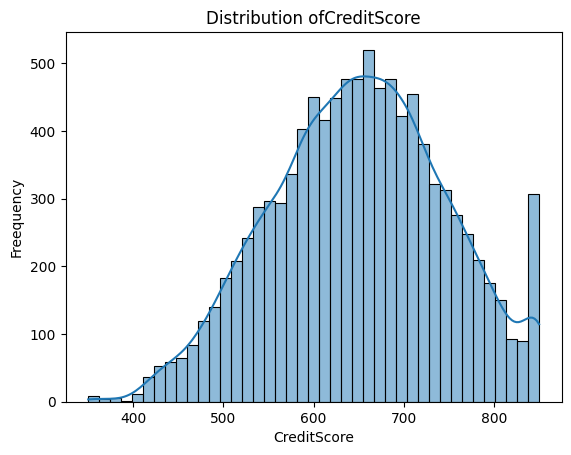

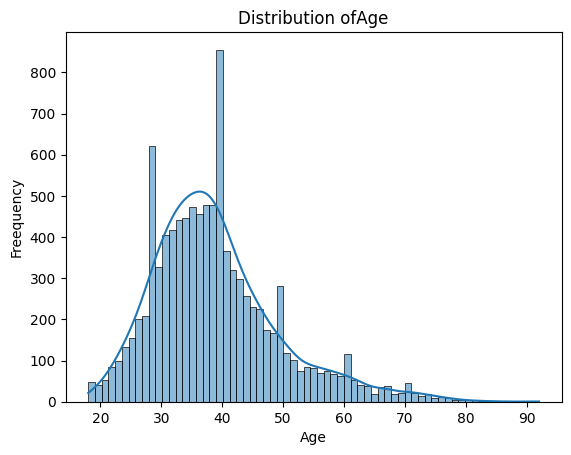

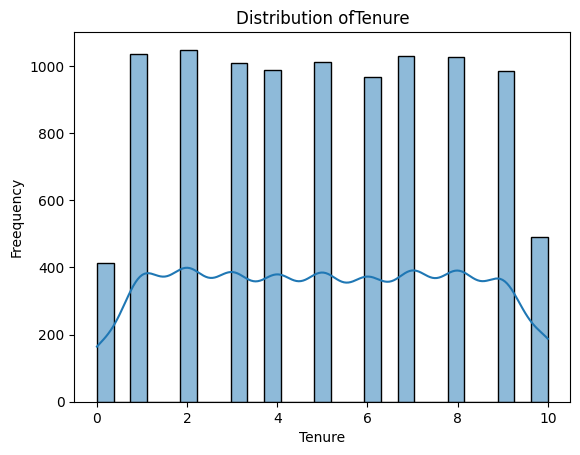

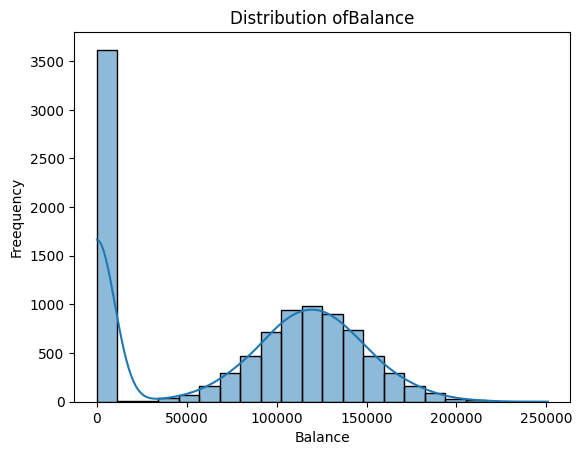

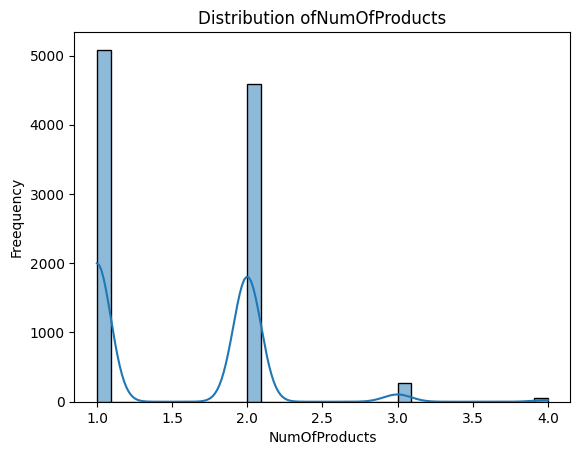

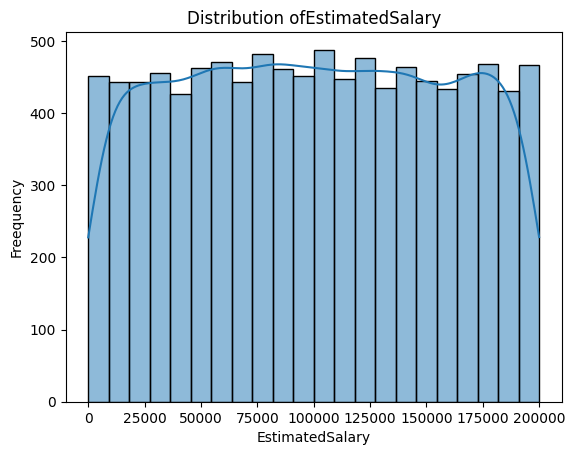

In [18]:
# 1. Distribution plots
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
  plt.figure()
  sns.histplot(df[col],kde=True)
  plt.title(f"Distribution of{col}")
  plt.xlabel(col)
  plt.ylabel("Freequency")
  plt.show()

The numerical features show varying distributions:

Age shows a slightly right-skewed distribution.

Balance contains many zero values.

EstimatedSalary appears uniformly distributed.

CreditScore is approximately normally distributed.

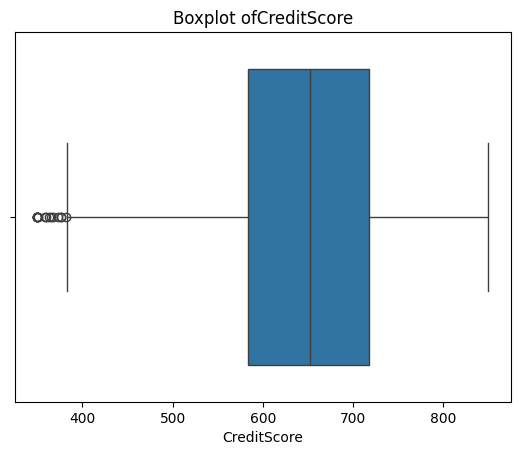

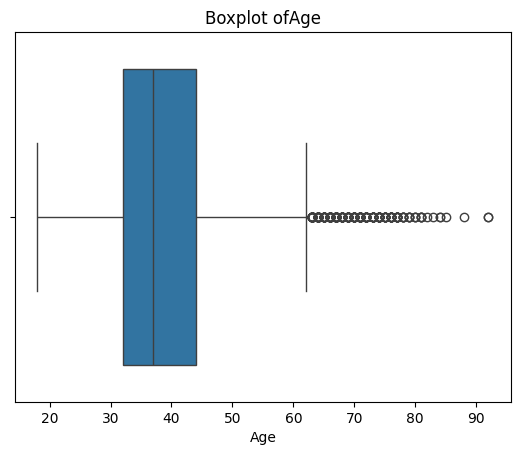

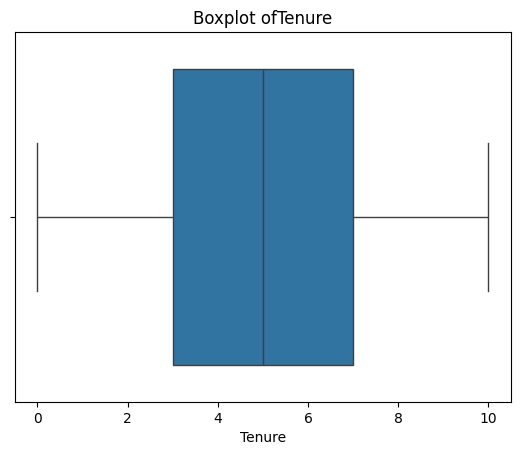

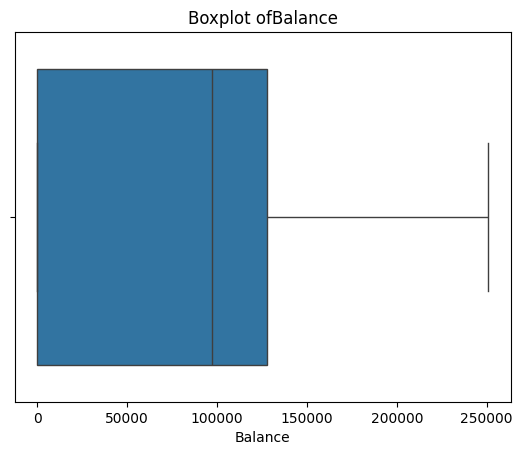

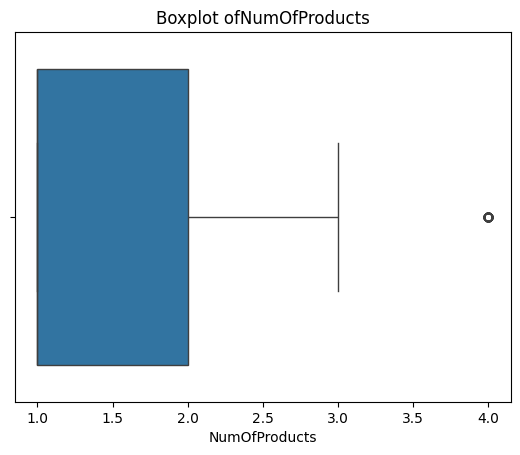

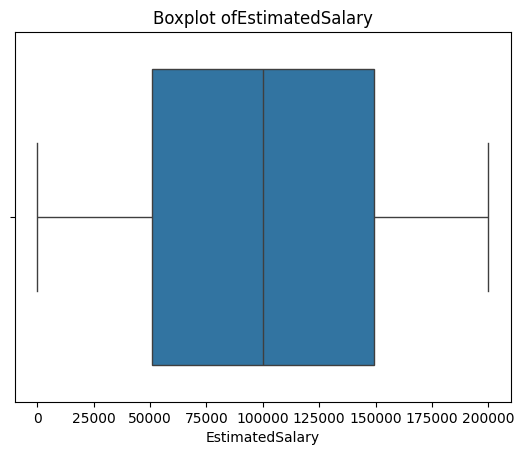

In [19]:
# Boxplot
for col in numerical_cols:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of{col}")
  plt.show()

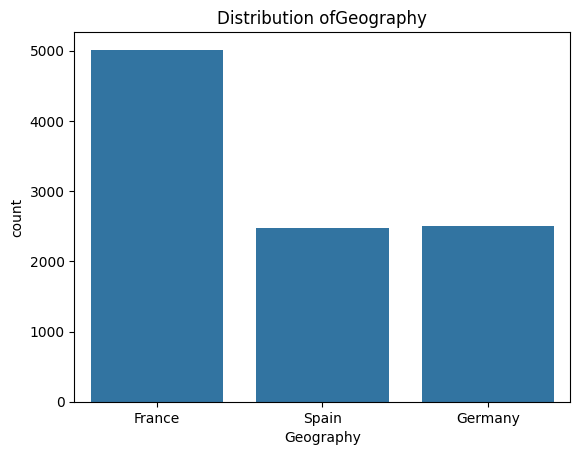

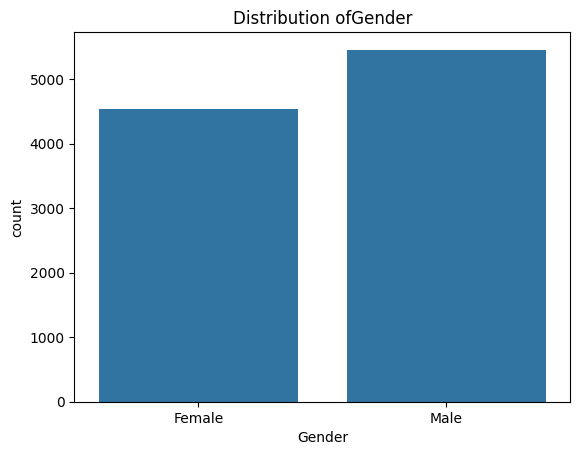

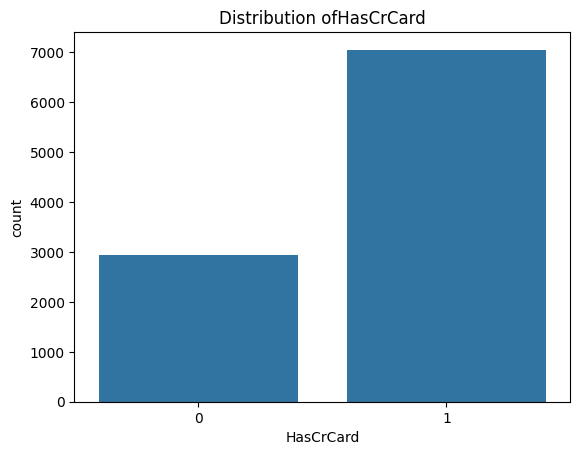

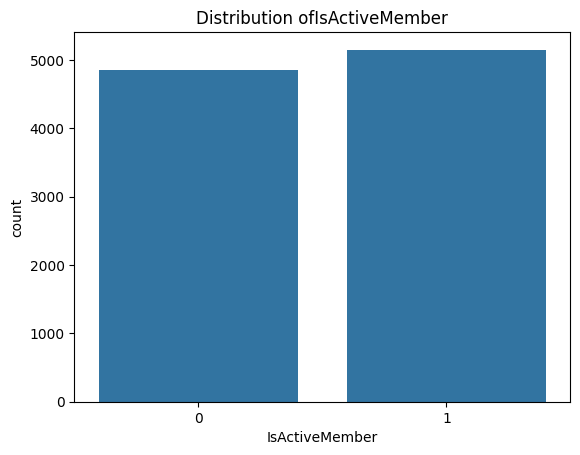

In [20]:
for col in categorical_cols:
  plt.figure()
  sns.countplot(x=col,data=df)
  plt.title(f"Distribution of{col}")
  plt.show()

# Feature vs Target Analysis

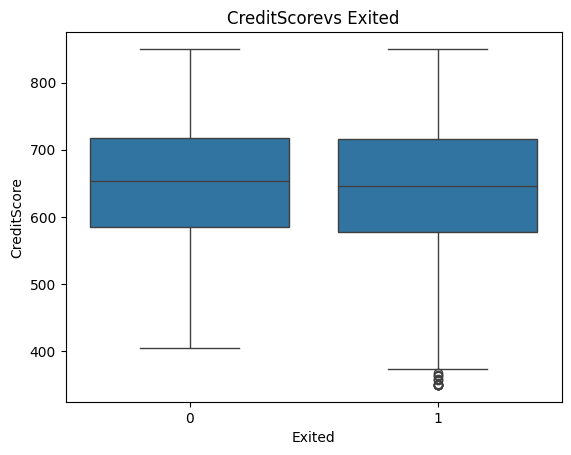

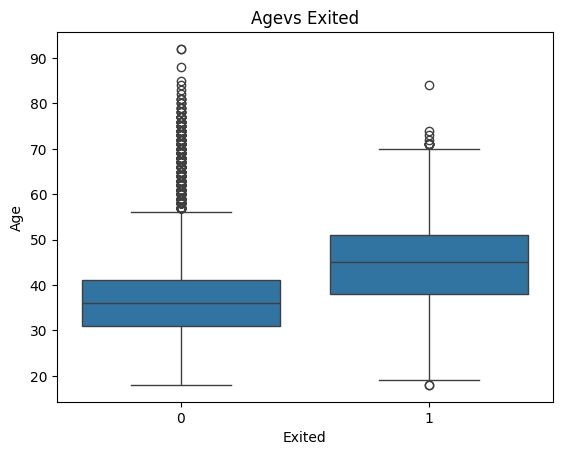

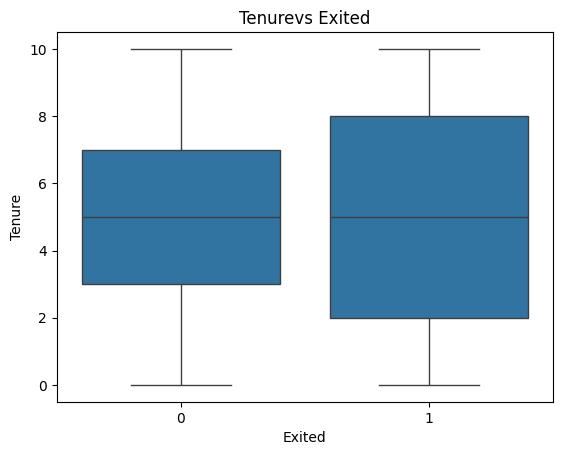

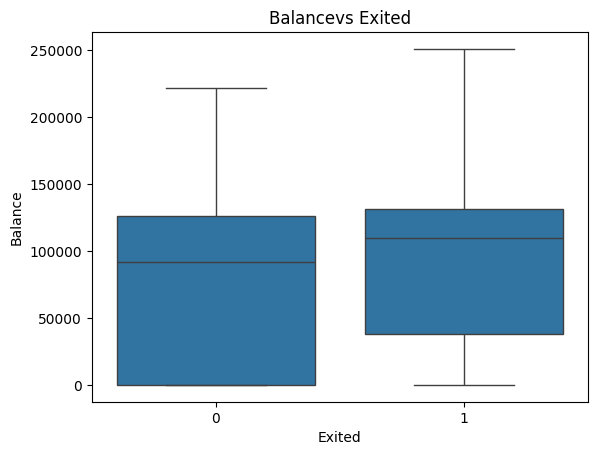

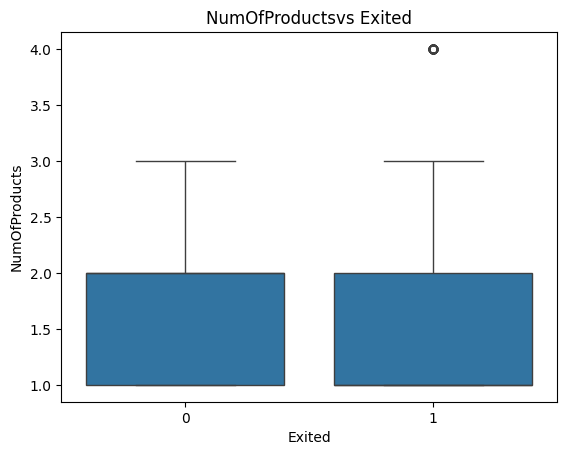

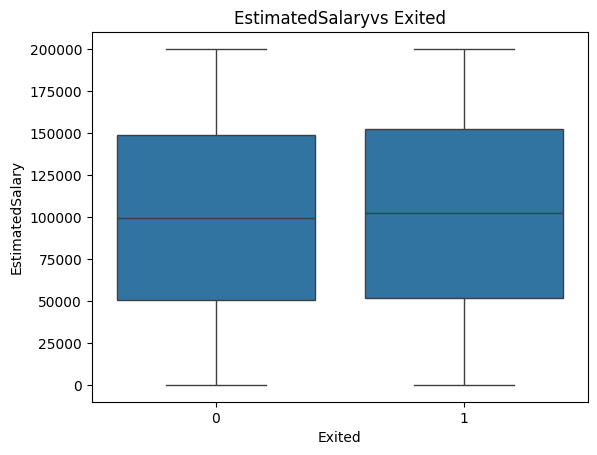

In [21]:
# Numerical vs Target
for col in numerical_cols:
  plt.figure()
  sns.boxplot(x="Exited",y=col,data=df)
  plt.title(f"{col}vs Exited")
  plt.show()

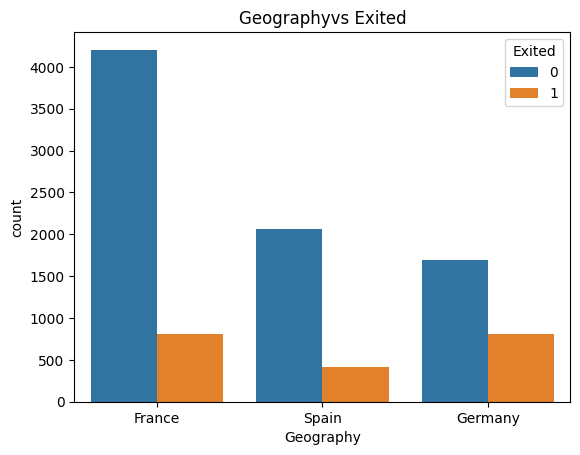

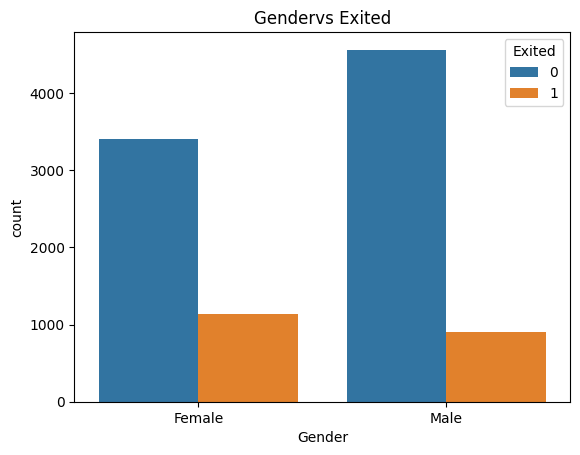

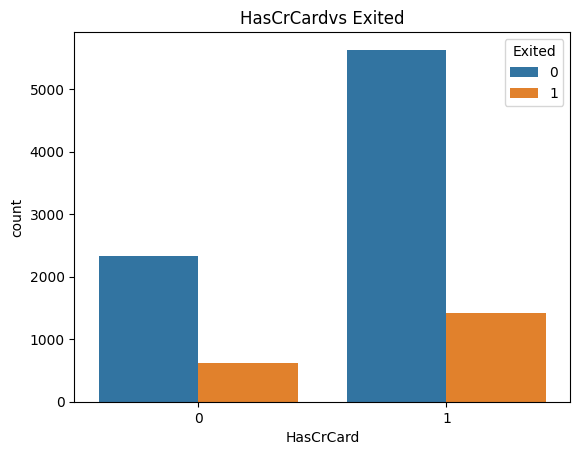

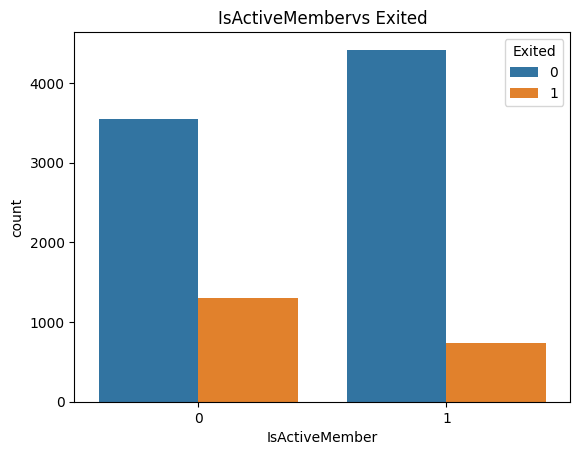

In [22]:
# Categorical vs Target
for col in categorical_cols:
  plt.figure()
  sns.countplot(x=col,hue="Exited",data=df)
  plt.title(f"{col}vs Exited")
  plt.show()

Customers who exited tend to be older on average.

Inactive members show a significantly higher churn rate.

Customers with higher balances appear more likely to churn.

EstimatedSalary shows weak separation between churned and non-churned customers.

These relationships suggest that Age, Balance, and IsActiveMember may be strong predictors of churn.

# Checking Outliers Using IQR

In [24]:
Q1=df['Balance'].quantile(0.25)
Q3=df['Balance'].quantile(0.75)

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [25]:
outliers=df[(df["Balance"]< lower_limit)|(df["Balance"]>upper_limit)]
print("Number of outliers in Balance:",len(outliers))

Number of outliers in Balance: 0


In [29]:
col = "Age"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower) | (df[col] > upper)]

print(col, "outlier percentage:",
      round(len(outliers)/len(df)*100,2), "%")


Age outlier percentage: 3.59 %


In [31]:
col="EstimatedSalary"
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower) | (df[col] > upper)]

print(col, "outlier percentage:",
      round(len(outliers)/len(df)*100,2), "%")


EstimatedSalary outlier percentage: 0.0 %


In [32]:
col="CreditScore"
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower) | (df[col] > upper)]

print(col, "outlier percentage:",
      round(len(outliers)/len(df)*100,2), "%")


CreditScore outlier percentage: 0.15 %


Balance: 0% outliers

EstimatedSalary: 0% outliers

CreditScore: 0.15% outliers

Age: 3.59% outliers

Since the percentage of outliers was minimal and these values represent valid customer data rather than data entry errors, no outlier treatment was applied.

Removing these values could reduce dataset representativeness and introduce bias.

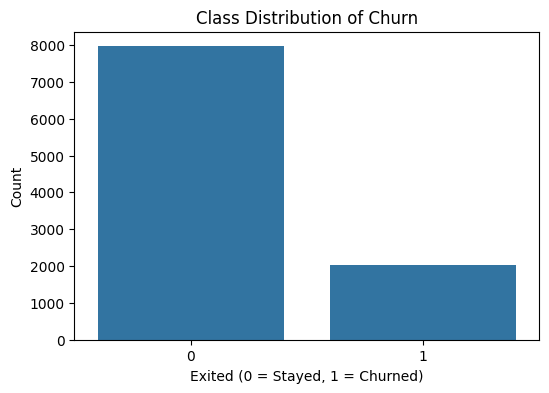

In [34]:

plt.figure(figsize=(6,4))
sns.countplot(x="Exited", data=df)
plt.title("Class Distribution of Churn")
plt.xlabel("Exited (0 = Stayed, 1 = Churned)")
plt.ylabel("Count")
plt.show()



# Label Encoding
Gender was encoded using binary mapping (Male = 1, Female = 0).

Geography was encoded using One-Hot Encoding to avoid introducing artificial ordinal relationships.

In [35]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})

In [37]:
df["Gender"].unique()


array([0, 1])

In [40]:
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)


#Feature Scaling

In [38]:
# Split the data
from sklearn.model_selection import train_test_split

X = df.drop("Exited", axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
# fit scalar only on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Numerical features were standardized using StandardScaler.
Scaling was applied after the train-test split to prevent data leakage.

